In [3]:
# !pip install pandas plotnine
# use any plotting library seaborn matplotlib,..........
from sklearn.neighbors import NearestNeighbors
from sklearn import *
import sklearn.datasets
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm
import pandas as pd
from sklearn.preprocessing import StandardScaler
from plotnine import *
from sklearn.cluster import DBSCAN

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy import stats
import scipy.cluster.hierarchy as shc
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering

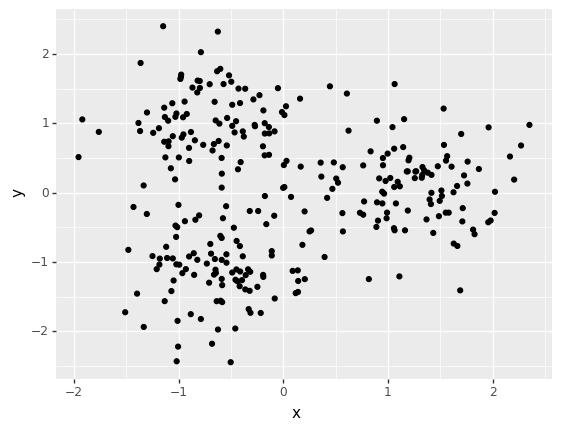

<ggplot: (-9223371897358835268)>

In [4]:
n_samples = 1500

d1 = sklearn.datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
d1=pd.DataFrame(d1[0])

d2 = sklearn.datasets.make_moons(n_samples=n_samples, noise=.05)
d2=pd.DataFrame(d2[0])

d3 = sklearn.datasets.make_blobs(n_samples=n_samples, random_state=8)
d3=pd.DataFrame(d3[0])

d4= np.random.rand(n_samples, 2), None
d4=pd.DataFrame(d4[0])

d5= pd.read_csv("dataset5.csv")
d6= pd.read_csv("dataset6.csv")
d7= pd.read_csv("dataset7.csv")
d8= pd.read_csv("dataset8.csv")
d9= pd.read_csv("dataset9.csv")

datasets=[d1]

z = StandardScaler()

d6[["x","y"]] = z.fit_transform(d6)

ggplot(d6, aes(x = "x", y = "y")) + geom_point() 


1) plot all dataset <br>
2) use standard scalar <br>
3) use K-means, agglomerative, dbscan <br>
4) plot dataset after clustering <br>
5) Evaluate inertia,silhouette score,.......... <br>

### Dataset 1

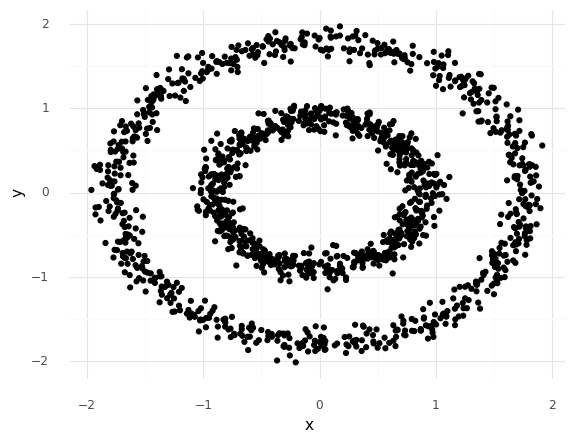

<ggplot: (-9223371897358922168)>

In [9]:
data1 = sklearn.datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
data1=pd.DataFrame(data1[0])

z = StandardScaler()

data1[["x","y"]] = z.fit_transform(data1)

ggplot(data1, aes(x = "x", y = "y")) + geom_point() + theme_minimal()
# ggplot(d1, aes(x = "x", y = "y")) + geom_point() 

In [18]:
# # dbscan and plot

# dbscan1 = DBSCAN(eps=0.4, min_samples=10).fit(data1)  #he read cluster like a noise
# print("dbscan1.labels_ = \n",dbscan1.labels_)
# print("dbscan1 = \n",dbscan1)
# labsList = ["Noise"]
# labsList = labsList + ["Cluster" + str(i) for i in range(1,len(set(dbscan1.labels_)))]

# data1["assignments"] = dbscan1.labels_

# ggplot(data1, aes(x = "x", y = "y" , color = "factor(assignments)")) + geom_point() + theme_minimal() \
# + scale_color_discrete(name = "Cluster assignments", labels=labsList) + theme(panel_grid_major = element_blank())

In [16]:
# grab only clustered data points
d1_clustered = data1.loc[(data1.assignments >= 0)]

silhouette_score(d1_clustered[["x","y"]], d1_clustered["assignments"])

C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


0.11379108589635056

C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `

C:\Users\Youssef\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\Youssef\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\Youssef\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


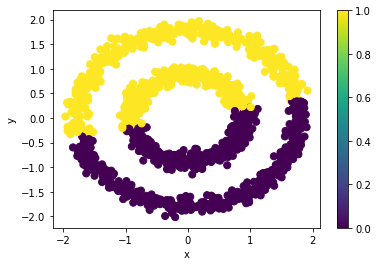

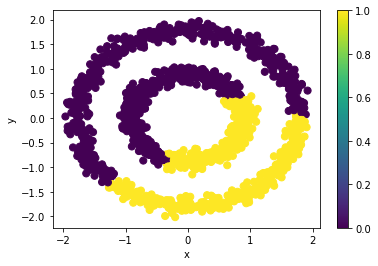

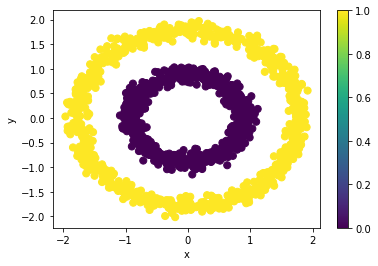

In [17]:
# comparing

km = KMeans(n_clusters=2, random_state=0).fit(data1)
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data1.x, data1.y, c=km.labels_, s=50)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(scatter)
fig.show()

aggler = AgglomerativeClustering(n_clusters=2, linkage='ward').fit(data1)
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data1.x, data1.y, c=aggler.labels_, s=50)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(scatter)
fig.show()

dbscan = DBSCAN(eps=.3, min_samples=10).fit(data1)
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data1.x, data1.y, c=dbscan.labels_, s=50)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(scatter)
fig.show()

### Dataset 2

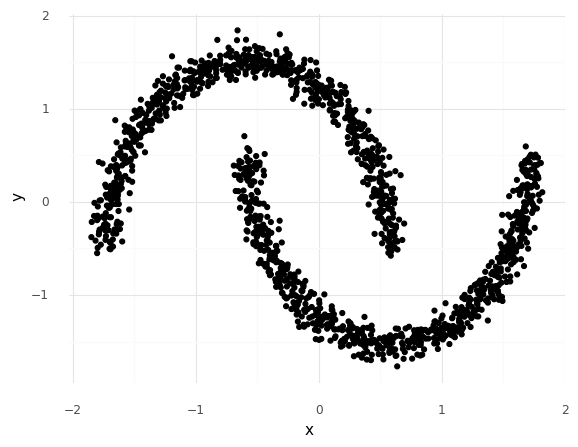

<ggplot: (-9223371897353404216)>

In [19]:
data2 = sklearn.datasets.make_moons(n_samples=n_samples, noise=.05)
data2=pd.DataFrame(data2[0])

z = StandardScaler()

data2[["x","y"]] = z.fit_transform(data2)

ggplot(data2, aes(x = "x", y = "y")) + geom_point() + theme_minimal()
 

dbscan2.labels_ = 
 [0 0 1 ... 1 1 0]
dbscan2 = 
 DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=25, n_jobs=None, p=None)


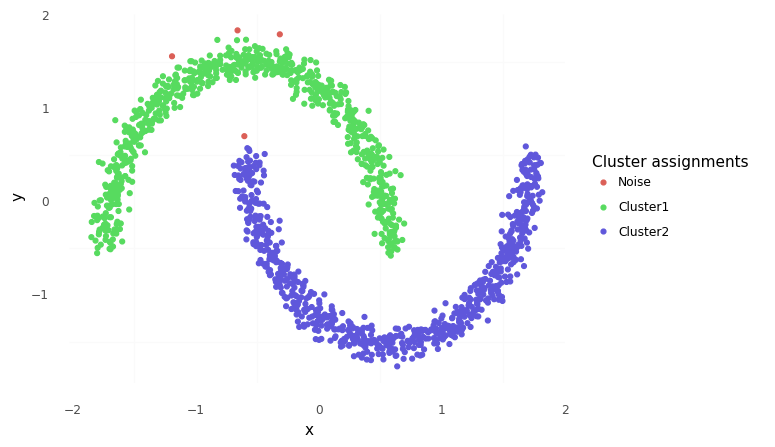

<ggplot: (-9223371897353413068)>

In [20]:
# dbscan and plot

dbscan2 = DBSCAN(eps=0.2, min_samples=25).fit(data2)
print("dbscan2.labels_ = \n",dbscan2.labels_)
print("dbscan2 = \n",dbscan2)
labsList = ["Noise"]
labsList = labsList + ["Cluster" + str(i) for i in range(1,len(set(dbscan2.labels_)))]

data2["assignments"] = dbscan2.labels_

ggplot(data2, aes(x = "x", y = "y" , color = "factor(assignments)")) + geom_point() + theme_minimal() \
+ scale_color_discrete(name = "Cluster assignments", labels=labsList) + theme(panel_grid_major = element_blank())

In [22]:
# grab only clustered data points
d2_clustered = data2.loc[(data2.assignments >= 0)]

silhouette_score(d2_clustered[["x","y"]], d2_clustered["assignments"])

C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


0.39150465788861416

C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `

C:\Users\Youssef\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\Youssef\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


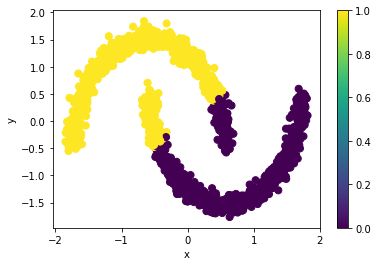

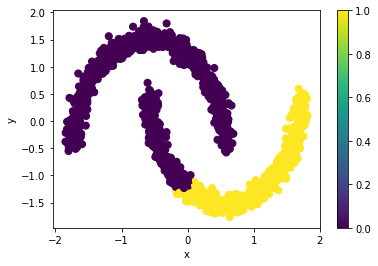

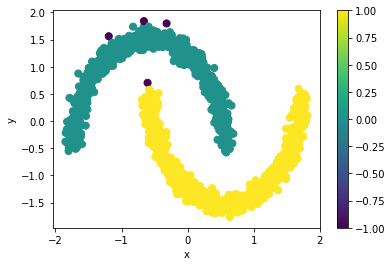

In [23]:
# comparing

km = KMeans(n_clusters=2, random_state=0).fit(data2)
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data2.x, data2.y, c=km.labels_, s=50)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(scatter)
fig.show()


aggler = AgglomerativeClustering(n_clusters=2, linkage='ward').fit(data2)
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data2.x, data2.y, c=aggler.labels_, s=50)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(scatter)
fig.show()


dbscan = DBSCAN(eps=.3, min_samples=10).fit(data2)
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data2.x, data2.y, c=dbscan.labels_, s=50)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(scatter)
fig.show()

### Dataset 3

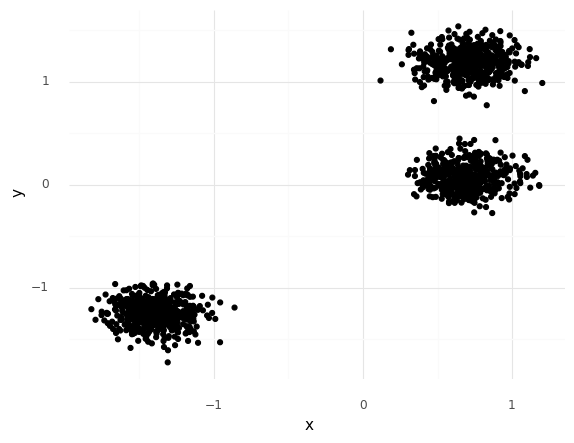

<ggplot: (-9223371897353293896)>

In [24]:
data3 = sklearn.datasets.make_blobs(n_samples=n_samples, random_state=8)
data3=pd.DataFrame(data3[0])

z = StandardScaler()

data3[["x","y"]] = z.fit_transform(data3)

ggplot(data3, aes(x = "x", y = "y")) + geom_point() + theme_minimal()
# ggplot(d3, aes(x = "x", y = "y")) + geom_point() 


dbscan3.labels_ = 
 [0 0 0 ... 0 2 2]
dbscan3 = 
 DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)


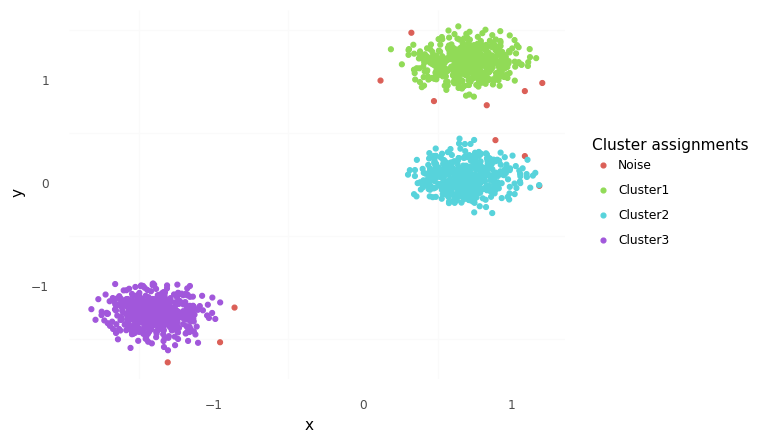

<ggplot: (-9223371897353238088)>

In [25]:
# dbscan and plot

dbscan3 = DBSCAN(eps=0.8, min_samples=10).fit(data3)
print("dbscan3.labels_ = \n",dbscan3.labels_)
print("dbscan3 = \n",dbscan3)
labsList = ["Noise"]
labsList = labsList + ["Cluster" + str(i) for i in range(1,len(set(dbscan3.labels_)))]

data3["assignments"] = dbscan3.labels_

ggplot(data3, aes(x = "x", y = "y" , color = "factor(assignments)")) + geom_point() + theme_minimal() \
+ scale_color_discrete(name = "Cluster assignments", labels=labsList) + theme(panel_grid_major = element_blank())

In [26]:
# grab only clustered data points
d3_clustered = data3.loc[(data3.assignments >= 0)]

silhouette_score(d3_clustered[["x","y"]], d3_clustered["assignments"])

C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


0.8140909415501575

C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `

C:\Users\Youssef\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\Youssef\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


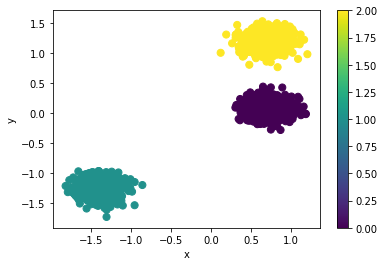

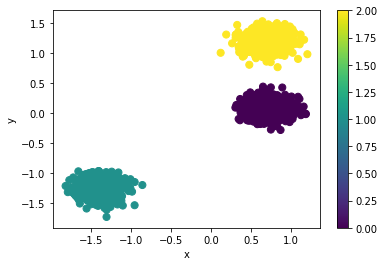

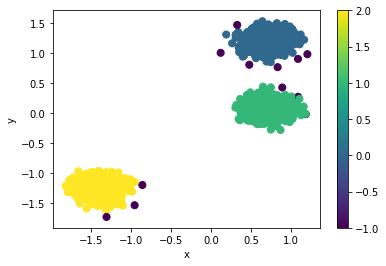

In [28]:
# comparing

km = KMeans(n_clusters=3, random_state=0).fit(data3)
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data3.x, data3.y, c=km.labels_, s=50)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(scatter)
fig.show()


aggler = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(data3)
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data3.x, data3.y, c=aggler.labels_, s=50)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(scatter)
fig.show()


dbscan = DBSCAN(eps=.8, min_samples=10).fit(data3)
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data3.x, data3.y, c=dbscan.labels_, s=50)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(scatter)
fig.show()

### Dataset 4

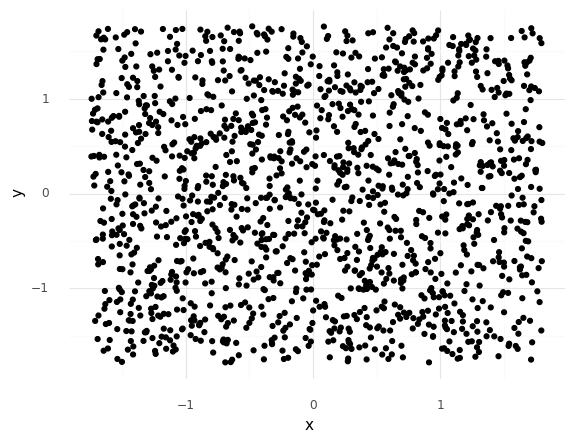

<ggplot: (-9223371897352716580)>

In [29]:
data4= np.random.rand(n_samples, 2), None
data4=pd.DataFrame(data4[0])

z = StandardScaler()

data4[["x","y"]] = z.fit_transform(data4)

ggplot(data4, aes(x = "x", y = "y")) + geom_point() + theme_minimal()
# ggplot(d4, aes(x = "x", y = "y")) + geom_point() 

dbscan4.labels_ = 
 [0 0 0 ... 0 0 0]
dbscan4 = 
 DBSCAN(algorithm='auto', eps=0.4, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=25, n_jobs=None, p=None)


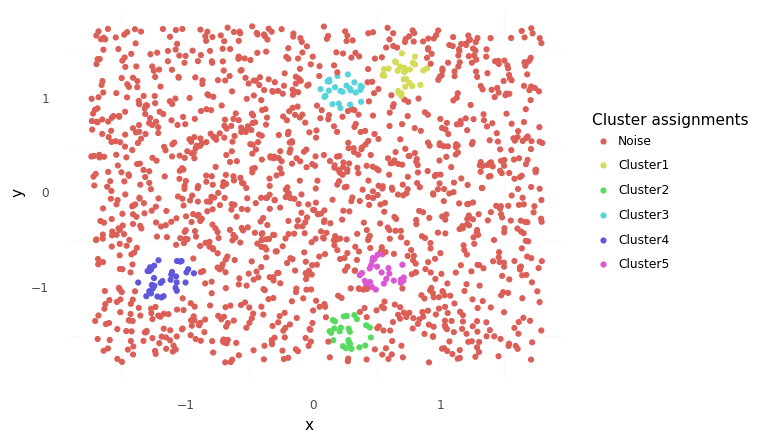

<ggplot: (-9223371897353220476)>

In [32]:
# dbscan and plot

dbscan4 = DBSCAN(eps=0.4, min_samples=25).fit(data4)
print("dbscan4.labels_ = \n",dbscan4.labels_)
print("dbscan4 = \n",dbscan4)
labsList = ["Noise"]
labsList = labsList + ["Cluster" + str(i) for i in range(1,len(set(dbscan4.labels_)))]

data4["assignments"] = dbscan4.labels_

ggplot(data4, aes(x = "x", y = "y" , color = "factor(assignments)")) + geom_point() + theme_minimal() \
+ scale_color_discrete(name = "Cluster assignments", labels=labsList) + theme(panel_grid_major = element_blank())

In [34]:
# grab only clustered data points
d4_clustered = data4.loc[(data4.assignments >= 0)]

silhouette_score(d4_clustered[["x","y"]], d4_clustered["assignments"])

C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


-0.41686120502157736

C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `

C:\Users\Youssef\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\Youssef\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


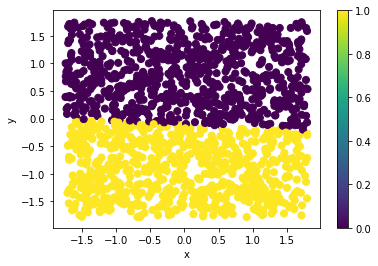

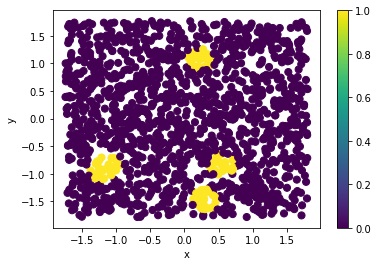

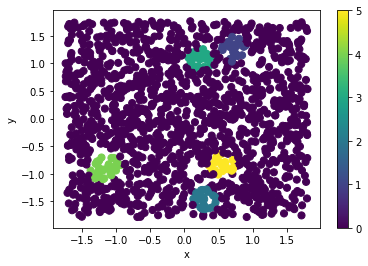

In [53]:
# comparing

km = KMeans(n_clusters=2, random_state=0).fit(data4)
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data4.x, data4.y, c=km.labels_, s=50)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(scatter)
fig.show()


aggler = AgglomerativeClustering(n_clusters=2, linkage='ward').fit(data4)
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data4.x, data4.y, c=aggler.labels_, s=50)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(scatter)
fig.show()


dbscan = DBSCAN(eps=.3, min_samples=10).fit(data4)
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data4.x, data4.y, c=dbscan.labels_, s=50)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(scatter)
fig.show()

### Dataset 5

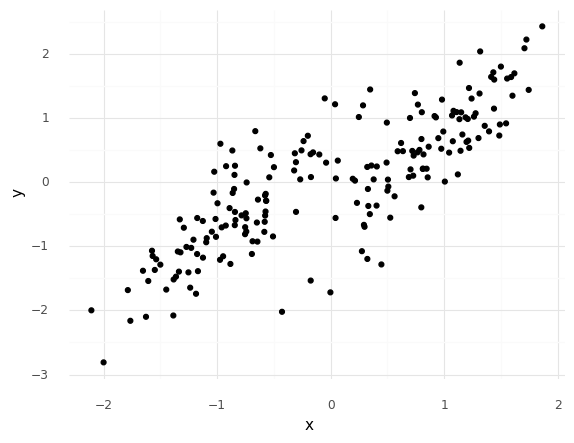

<ggplot: (-9223371897355134820)>

In [36]:
data5= pd.read_csv("dataset5.csv")
z = StandardScaler()

data5[["x","y"]] = z.fit_transform(data5)

ggplot(data5, aes(x = "x", y = "y")) + geom_point() + theme_minimal()
# ggplot(d5, aes(x = "x", y = "y")) + geom_point() 

dbscan5.labels_ = 
 [-1  2 -1  2  0 -1  0 -1  0 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  0 -1 -1
 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1  0  0 -1  1 -1 -1 -1 -1 -1 -1
  1  2 -1 -1  1  0  2  1  0 -1 -1 -1  2  1 -1 -1 -1  2 -1 -1  1 -1  0 -1
 -1 -1  1 -1  1 -1 -1 -1  2  0  0 -1 -1  0  0  1 -1 -1 -1  1 -1 -1 -1 -1
 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  3 -1 -1  3  3 -1  3  3 -1  3 -1 -1
  3 -1 -1 -1  3 -1  3 -1 -1  3 -1 -1 -1  3  3 -1  3  3 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  3 -1  3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  3 -1 -1  3 -1
  3 -1  3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  3 -1 -1 -1 -1 -1 -1 -1 -1
 -1  3 -1  3 -1  3 -1]
dbscan5 = 
 DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)


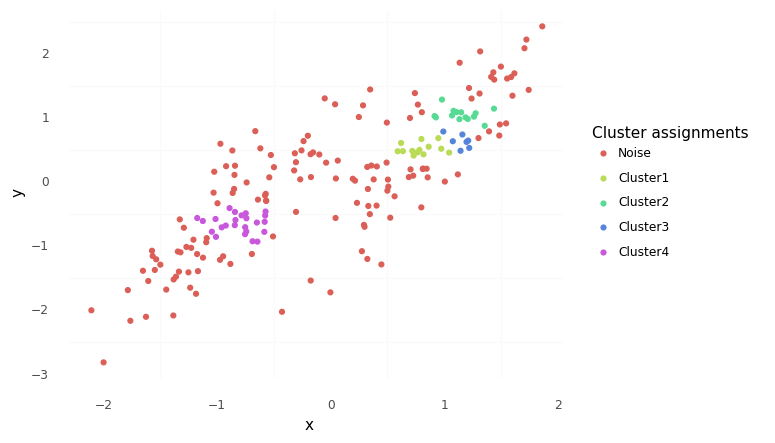

<ggplot: (-9223371897355376704)>

In [37]:
dbscan5 = DBSCAN(eps=0.3, min_samples=10).fit(data5)
print("dbscan5.labels_ = \n",dbscan5.labels_)
print("dbscan5 = \n",dbscan5)
labsList = ["Noise"]
labsList = labsList + ["Cluster" + str(i) for i in range(1,len(set(dbscan5.labels_)))]

data5["assignments"] = dbscan5.labels_

ggplot(data5, aes(x = "x", y = "y" , color = "factor(assignments)")) + geom_point() + theme_minimal() \
+ scale_color_discrete(name = "Cluster assignments", labels=labsList) + theme(panel_grid_major = element_blank())

In [38]:
# grab only clustered data points
d5_clustered = data5.loc[(data5.assignments >= 0)]

silhouette_score(d5_clustered[["x","y"]], d5_clustered["assignments"])

C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


0.6283478212193833

C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `

C:\Users\Youssef\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


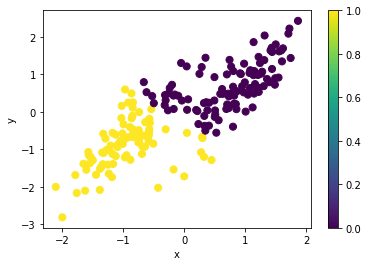

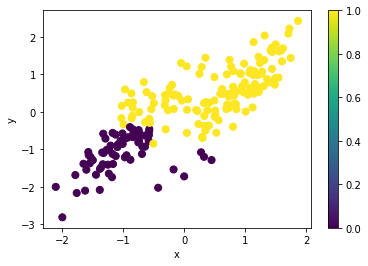

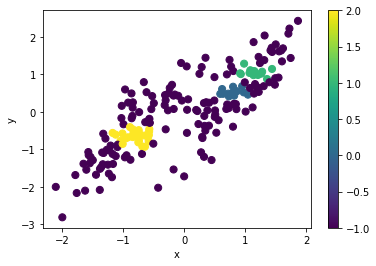

In [39]:
# comparing

km = KMeans(n_clusters=2, random_state=0).fit(data5)
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data5.x, data5.y, c=km.labels_, s=50)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(scatter)
fig.show()


aggler = AgglomerativeClustering(n_clusters=2, linkage='ward').fit(data5)
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data5.x, data5.y, c=aggler.labels_, s=50)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(scatter)
fig.show()


dbscan = DBSCAN(eps=.3, min_samples=10).fit(data5)
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data5.x, data5.y, c=dbscan.labels_, s=50)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(scatter)
fig.show()

### Dataset 6

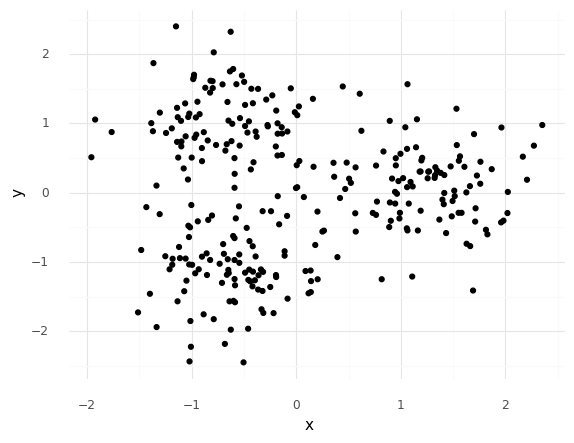

<ggplot: (-9223371897355445016)>

In [40]:
data6= pd.read_csv("dataset6.csv")
z = StandardScaler()

data6[["x","y"]] = z.fit_transform(data6)

ggplot(d6, aes(x = "x", y = "y")) + geom_point() + theme_minimal()
# ggplot(d6, aes(x = "x", y = "y")) + geom_point() 

dbscan6.labels_ = 
 [-1 -1  0 -1 -1  0 -1 -1 -1 -1  0 -1 -1  0 -1 -1 -1  0 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  0  0  0 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  0  0 -1  0 -1 -1  0 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1  0 -1
  0  0 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1  0 -1 -1
 -1  0 -1 -1  1  2  1 -1 -1 -1 -1  1 -1 -1 -1  2 -1  1  1 -1 -1  2  1  1
 -1 -1 -1 -1 -1  1  2 -1  2 -1 -1 -1 -1  1 -1  1  1  2  1 -1 -1 -1  1 -1
 -1 -1 -1 -1  1 -1  1 -1  1 -1  2 -1 -1  1  1 -1 -1 -1  1 -1 -1  1  1  1
 -1  1  1 -1 -1 -1  1  1 -1  1 -1  2 -1  1  2 -1  1 -1 -1 -1 -1 -1 -1  2
  1  1 -1  1 -1  2 -1 -1 -1  3 -1  3 -1 -1  3 -1 -1 -1 -1 -1 -1  3 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  3 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  3 -1  3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  3 -1 -1 -1 -1 -1 -1  3 -1 -1 -1 -1 -1  3 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
dbscan6 = 
 DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='e

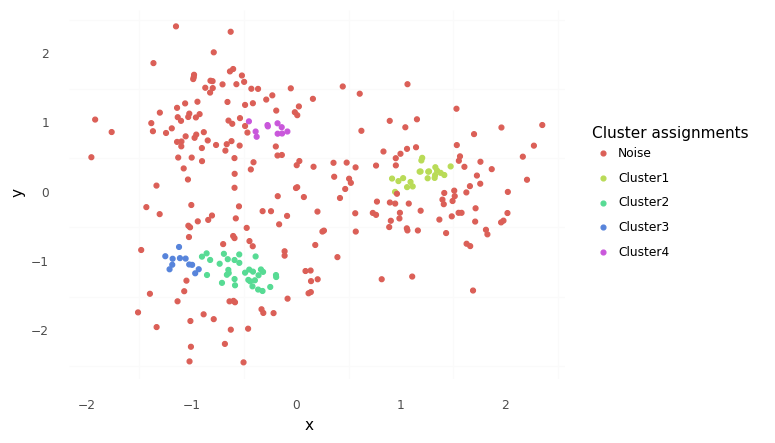

<ggplot: (-9223371897353396328)>

In [41]:
dbscan6 = DBSCAN(eps=0.3, min_samples=10).fit(data6)
print("dbscan6.labels_ = \n",dbscan6.labels_)
print("dbscan6 = \n",dbscan6)
labsList = ["Noise"]
labsList = labsList + ["Cluster" + str(i) for i in range(1,len(set(dbscan6.labels_)))]

data6["assignments"] = dbscan6.labels_

ggplot(data6, aes(x = "x", y = "y" , color = "factor(assignments)")) + geom_point() + theme_minimal() \
+ scale_color_discrete(name = "Cluster assignments", labels=labsList) + theme(panel_grid_major = element_blank())

In [42]:
# grab only clustered data points
d6_clustered = data6.loc[(data6.assignments >= 0)]

silhouette_score(d6_clustered[["x","y"]], d6_clustered["assignments"])

C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


0.6363958544773387

C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `

C:\Users\Youssef\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\Youssef\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


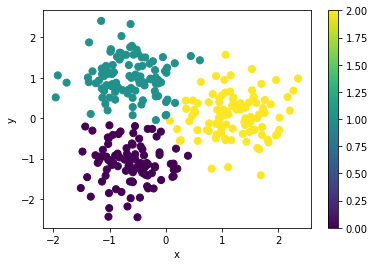

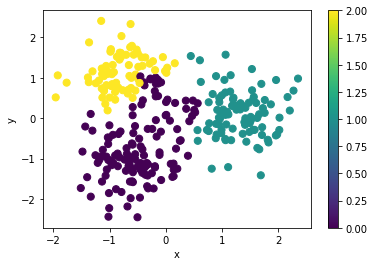

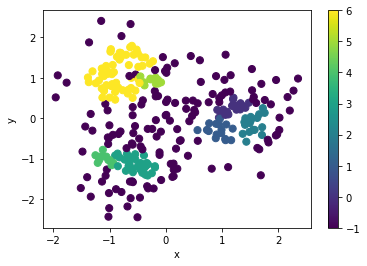

In [45]:
# comparing

km = KMeans(n_clusters=3, random_state=0).fit(data6)
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data6.x, data6.y, c=km.labels_, s=50)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(scatter)
fig.show()


aggler = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(data6)
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data6.x, data6.y, c=aggler.labels_, s=50)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(scatter)
fig.show()


dbscan = DBSCAN(eps=.4, min_samples=10).fit(data6)
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data6.x, data6.y, c=dbscan.labels_, s=50)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(scatter)
fig.show()

### Dataset 7

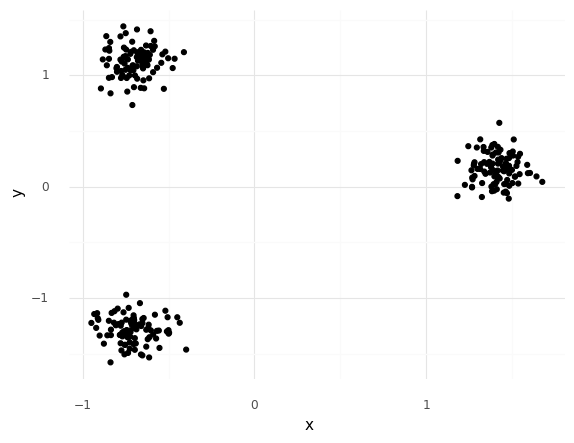

<ggplot: (-9223371897352638080)>

In [46]:
data7= pd.read_csv("dataset7.csv")
z = StandardScaler()

data7[["x","y"]] = z.fit_transform(data7)

ggplot(data7, aes(x = "x", y = "y")) + geom_point() + theme_minimal()
# ggplot(d7, aes(x = "x", y = "y")) + geom_point() 

C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `

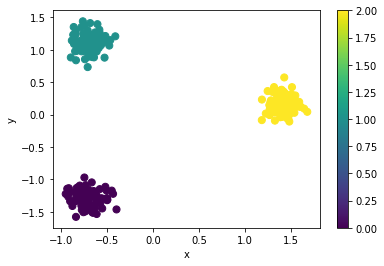

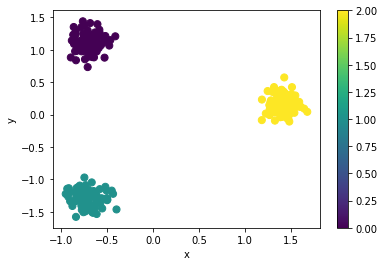

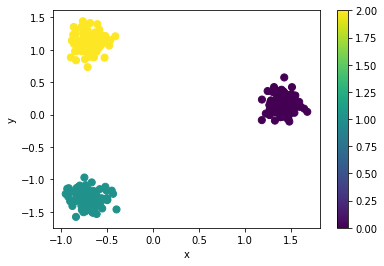

In [52]:
# comparing

km = KMeans(n_clusters=3, random_state=0).fit(data7)
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data7.x, data7.y, c=km.labels_, s=50)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(scatter)
fig.show()


aggler = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(data7)
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data7.x, data7.y, c=aggler.labels_, s=50)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(scatter)
fig.show()


dbscan = DBSCAN(eps=.3, min_samples=10).fit(data7)
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data7.x, data7.y, c=dbscan.labels_, s=50)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(scatter)
fig.show()

### Dataset 8

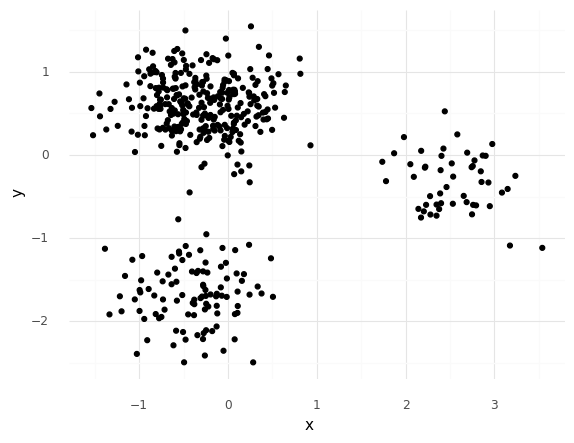

<ggplot: (-9223371897355572824)>

In [54]:
data8= pd.read_csv("dataset8.csv")
z = StandardScaler()

data8[["x","y"]] = z.fit_transform(data8)

ggplot(data8, aes(x = "x", y = "y")) + geom_point() + theme_minimal()
# ggplot(d8, aes(x = "x", y = "y")) + geom_point() 

In [57]:
# grab only clustered data points
d8_clustered = data8.loc[(data8.assignments >= 0)]

silhouette_score(d8_clustered[["x","y"]], d8_clustered["assignments"])

C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


0.7034648896694939

C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `

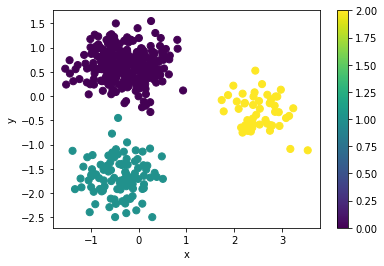

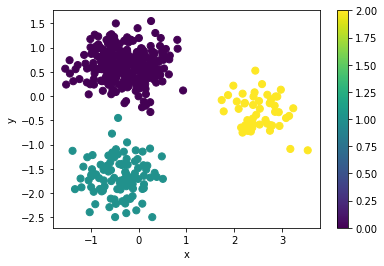

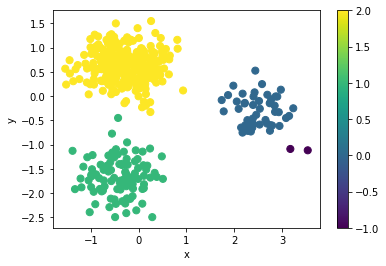

In [59]:
# comparing

km = KMeans(n_clusters=3, random_state=0).fit(data8)
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data8.x, data8.y, c=km.labels_, s=50)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(scatter)
fig.show()


aggler = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(data8)
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data8.x, data8.y, c=aggler.labels_, s=50)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(scatter)
fig.show()


dbscan = DBSCAN(eps=.5, min_samples=10).fit(data8)
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data8.x, data8.y, c=dbscan.labels_, s=50)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(scatter)
fig.show()

### Dataset 9

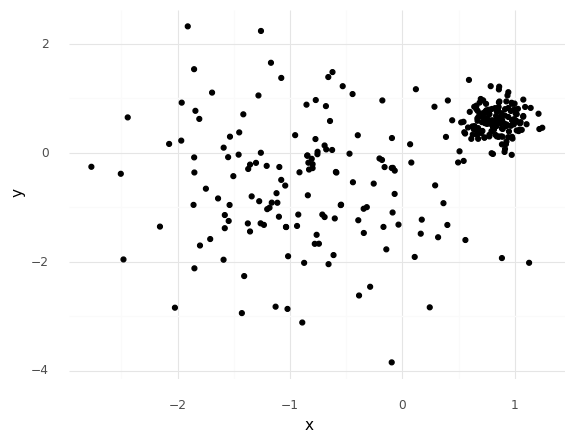

<ggplot: (-9223371897353425672)>

In [60]:
data9= pd.read_csv("dataset9.csv")
z = StandardScaler()

data9[["x","y"]] = z.fit_transform(data9)

ggplot(data9, aes(x = "x", y = "y")) + geom_point() + theme_minimal()
# ggplot(d9, aes(x = "x", y = "y")) + geom_point() 

In [62]:
# grab only clustered data points
d9_clustered = data9.loc[(data9.assignments >= 0)]

silhouette_score(d9_clustered[["x","y"]], d9_clustered["assignments"])

C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


0.8058974148354288

C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `

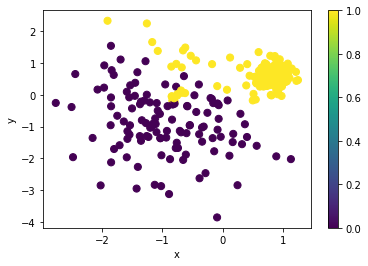

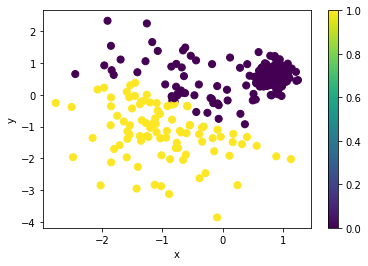

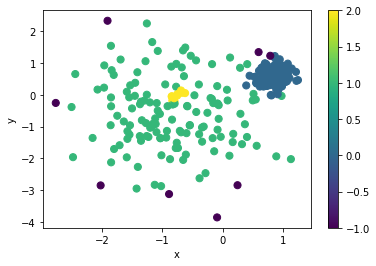

In [67]:
# comparing

km = KMeans(n_clusters=2, random_state=0).fit(data9)
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data9.x, data9.y, c=km.labels_, s=50)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(scatter)
fig.show()


aggler = AgglomerativeClustering(n_clusters=2, linkage='ward').fit(data9)
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data9.x, data9.y, c=aggler.labels_, s=50)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(scatter)
fig.show()


dbscan = DBSCAN(eps=.8, min_samples=10).fit(data9)
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data9.x, data9.y, c=dbscan.labels_, s=50)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(scatter)
fig.show()